In [1]:
from datasets import Dataset
from lightgbm import LGBMClassifier
import pandas as pd

In [2]:
train_dataset = Dataset.from_file("data/train.arrow")
dtypes = {}
for k, v in train_dataset.features.items():
    dtype = v.dtype
    if dtype == "bool":
        dtypes[k] = pd.CategoricalDtype([True, False])

train_df = train_dataset.to_pandas()
train_X = train_df.iloc[:, :-1].astype(dtypes)
train_y = train_df.iloc[:, -1]

valid_dataset = Dataset.from_file("data/valid.arrow")
valid_df = valid_dataset.to_pandas()
valid_X = valid_df.iloc[:, :-1].astype(dtypes)
valid_y = valid_df.iloc[:, -1]

In [3]:
model = LGBMClassifier(objective="binary")

In [4]:
model.fit(train_X, train_y)

LGBMClassifier(objective='binary')

In [5]:
model.score(valid_X, valid_y)

0.9640571514852849

In [6]:
import pandas as pd
from pathlib import Path
from generate_gam_records import generate_xuen_dict_from_jsonl_file, generate_gbm_record_from_xuen_dicts

In [16]:
xuen_dicts = generate_xuen_dict_from_jsonl_file(Path("data/valid.jsonl"))

def tag_filter(idx, other_idx, tag, other_tag):

    if tag and other_tag:
        return True

    # if other_idx - idx <= 2:
    #     return True
    
    return False


def tag_filter2(idx, other_idx, tag, other_tag):

    if tag or other_tag:
        return True

    # if other_idx - idx <= 2:
    #     return True
    
    return False

In [11]:
# 0.935
records = list(generate_gbm_record_from_xuen_dicts(xuen_dicts, tag_filter))
_df = pd.DataFrame(records)
_df = _df.astype(dtypes)
_X = _df.iloc[:, :-1]
_y = _df.iloc[:, -1]
model.score(_X, _y)

In [17]:
records = list(generate_gbm_record_from_xuen_dicts(xuen_dicts, tag_filter2))
_df = pd.DataFrame(records)
_df = _df.astype(dtypes)
_X = _df.iloc[:, :-1]
_y = _df.iloc[:, -1]
model.score(_X, _y)

1148it [00:55, 20.60it/s]


0.9807740768740457

In [18]:
from lightgbm import plot_importance, plot_tree

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

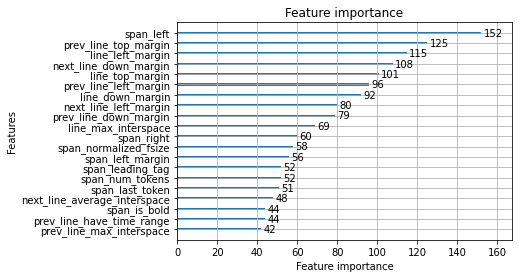

In [29]:
plot_importance(model, max_num_features=20)

In [23]:
np.argsortmodel.feature_importances_

Docstring:
a.argsort(axis=-1, kind=None, order=None)

Returns the indices that would sort this array.

Refer to `numpy.argsort` for full documentation.

See Also
--------
numpy.argsort : equivalent function
Type:      builtin_function_or_method


In [25]:
import numpy as np

In [ ]:
np.

In [86]:
import json
with open("data/xuen_dicts.jsonl") as f:
    data = [json.loads(line) for line in f]

In [87]:
import math
from latain.data import Block, BlockHandcraftRecord

In [138]:
block = Block.from_dict(data[3000])
flat_records = BlockHandcraftRecord.from_block(block).to_flat_records()
df = pd.DataFrame(flat_records).iloc[:, :-1]
df = df.astype(train_X.dtypes)
labels = model.predict(df)
# num_spans = int(math.sqrt(labels.shape[0]))
# labels = labels.reshape(num_spans, num_spans)

In [142]:
train_X.dtypes

line_is_first                   category
line_is_last                    category
line_id                         category
line_leading_fsize               float64
line_max_fsize                   float64
                                  ...   
next_span_first_token_tag       category
next_span_last_token            category
next_span_last_token_tag        category
next_span_leading_tag           category
next_span_text_is_time_range    category
Length: 144, dtype: object

In [ ]:
train_X.dtypes
def predict_adj_matrix(block_handcraft_record: BlockHandcraftRecord, dtypes):
    flat_records = block_handcraft_record.to_flat_records()
    num_spans = len(block_handcraft_record.span_features)
    df = pd.DataFrame(flat_records).iloc[:, :-1]
    df = df.astype(dtypes)
    labels = model.predict(df)
    adj = np.zeros((num_spans, num_spans))
    adj[np.triu_indices(num_spans, k=1)] = labels
    adj = adj + adj.T
    return adj

In [145]:
adj.diagonal = 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [101]:
num_spans = sum([len(i) for i in block])


In [106]:
import numpy as np

In [116]:
np.triu_indices(3, k=1)

(array([0, 0, 1]), array([1, 2, 2]))

In [118]:
adj = np.zeros((num_spans, num_spans))
adj[np.triu_indices(num_spans, k=1)] = labels

In [120]:
adj = adj + adj.T

In [124]:
for idx, span in enumerate(all_spans):
    if span.tag:
        print(idx, span.tag)

15 timeRange
16 depart|title
17 company
21 timeRange
22 depart|title
23 company


In [127]:
a = adj[15]

In [134]:
for idx, i in enumerate(adj[17]):
    if i == 1:
        print(idx)

23


In [110]:
np.triu_indices(num_spans)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 10

In [105]:
all_spans = [j for i in block for j in i]

In [ ]:
for span in all_spans

In [103]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [96]:
len(flat_records)

351

1. 只取上三角阵的数据
2. 对数据进行一定的过滤
3. 重要性
4. 分组算法
4. 画图

In [93]:
block[1]

[Span(pos=Position(left=57.546875, top=394.9499969482422, right=118.25006866455078, down=408.27000427246094), fsize=9.0, font='NotoSansCJKsc-Bold', color=Color(r=0, g=0, b=0), text='2016/10 - 至今', tag='timeRange'), Span(pos=Position(left=130.25, top=394.9499969482422, right=302.16510009765625, down=408.27000427246094), fsize=9.0, font='NotoSansCJKsc-Bold', color=Color(r=0, g=0, b=0), text='宁波顺声通讯设备有限公司(1年10个月)', tag='company')]

In [95]:
idx = 0
for i in block:
    for j in i:
        print(idx, j.text)
        idx += 1

0 工作经历
1 2016/10 - 至今
2 宁波顺声通讯设备有限公司(1年10个月)
3 大区经理|8001-10000元/月
4 IT服务(系统/数据/维护)
5 工作描述:负责东北区域团队建设,销售管理。
6 2013/01 - 2016/10
7 中国电信集团公司沈阳分公司(3年9个月)
8 渠道客戸经理|4001-6000元/月
9 通信/电信运营,增值服务
10 工作描述:推广电信业务,维护客戸。
11 1999/12 - 2012/12
12 沈阳公安消防部队(13年)
13 队长助理|4001-6000元/月


In [101]:
df.dtypes

line_is_first                   category
line_is_last                    category
line_id                         category
line_leading_fsize               float64
line_max_fsize                   float64
                                  ...   
next_span_first_token_tag       category
next_span_last_token            category
next_span_last_token_tag        category
next_span_leading_tag           category
next_span_text_is_time_range    category
Length: 144, dtype: object

In [110]:
from datasets import Dataset, Features, Value

In [106]:
dt = Dataset.from_file("data/work_gbm_100.arrow")

In [107]:
df = dt.to_pandas()

In [125]:
features = Features(names=[Value("int64")])

In [133]:
records = {"names": [(2, 3), (3, 4, 5)]}

In [134]:
Dataset.from_dict(records).features

{'names': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)}

In [135]:
from datasets import load_dataset

In [136]:
dt = load_dataset("mnist")

Downloading:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/989 [00:00<?, ?B/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/9.91M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.9k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.54k [00:00<?, ?B/s]

  0%|          | 0/4 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset mnist downloaded and prepared to /home/wangyuxin/.cache/huggingface/datasets/mnist/mnist/1.0.0/5064c25e57a1678f700d2dc798ffe8a6d519405cca7d33670fffda477857a994. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [140]:
dt["train"].features

{'image': Array2D(shape=(28, 28), dtype='uint8', id=None),
 'label': ClassLabel(num_classes=10, names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], names_file=None, id=None)}

In [142]:
dt = Dataset.from_file("/data/qiaowei/coco2014_caption.arrow")

OSError: Invalid flatbuffers message.

In [ ]:
dt.features

In [143]:
import json

In [157]:
with open("/data/qiaowei/coco2014/annotations/captions_val2014.json") as f:
    data = json.load(f)

In [1]:
from datasets.features.image import Image

In [161]:
id_file_name_map = {i["id"]: i["file_name"] for i in data["images"]}

In [ ]:
features = Features(
    image=Image()
)

In [163]:
data["annotations"]

[{'image_id': 203564,
  'id': 37,
  'caption': 'A bicycle replica with a clock as the front wheel.'},
 {'image_id': 179765,
  'id': 38,
  'caption': 'A black Honda motorcycle parked in front of a garage.'},
 {'image_id': 322141,
  'id': 49,
  'caption': 'A room with blue walls and a white sink and door.'},
 {'image_id': 16977,
  'id': 89,
  'caption': 'A car that seems to be parked illegally behind a legally parked car'},
 {'image_id': 106140,
  'id': 98,
  'caption': 'A large passenger airplane flying through the air.'},
 {'image_id': 106140,
  'id': 101,
  'caption': 'There is a GOL plane taking off in a partly cloudy sky.'},
 {'image_id': 322141,
  'id': 109,
  'caption': 'Blue and white color scheme in a small bathroom.'},
 {'image_id': 322141,
  'id': 121,
  'caption': 'This is a blue and white bathroom with a wall sink and a lifesaver on the wall.'},
 {'image_id': 322141,
  'id': 163,
  'caption': 'A blue boat themed bathroom with a life preserver on the wall'},
 {'image_id': 203

In [160]:
data["images"][:10]

[{'license': 3,
  'file_name': 'COCO_val2014_000000391895.jpg',
  'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg',
  'height': 360,
  'width': 640,
  'date_captured': '2013-11-14 11:18:45',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'id': 391895},
 {'license': 4,
  'file_name': 'COCO_val2014_000000522418.jpg',
  'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000522418.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-14 11:38:44',
  'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg',
  'id': 522418},
 {'license': 3,
  'file_name': 'COCO_val2014_000000184613.jpg',
  'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000184613.jpg',
  'height': 336,
  'width': 500,
  'date_captured': '2013-11-14 12:36:29',
  'flickr_url': 'http://farm3.staticflickr.com/2169/2118578392_1193aa04a0_z.jpg',
  'id': 184613},
 {'license': 3,
  'file_name': 'COC

In [159]:
data["annotations"][:10]

[{'image_id': 203564,
  'id': 37,
  'caption': 'A bicycle replica with a clock as the front wheel.'},
 {'image_id': 179765,
  'id': 38,
  'caption': 'A black Honda motorcycle parked in front of a garage.'},
 {'image_id': 322141,
  'id': 49,
  'caption': 'A room with blue walls and a white sink and door.'},
 {'image_id': 16977,
  'id': 89,
  'caption': 'A car that seems to be parked illegally behind a legally parked car'},
 {'image_id': 106140,
  'id': 98,
  'caption': 'A large passenger airplane flying through the air.'},
 {'image_id': 106140,
  'id': 101,
  'caption': 'There is a GOL plane taking off in a partly cloudy sky.'},
 {'image_id': 322141,
  'id': 109,
  'caption': 'Blue and white color scheme in a small bathroom.'},
 {'image_id': 322141,
  'id': 121,
  'caption': 'This is a blue and white bathroom with a wall sink and a lifesaver on the wall.'},
 {'image_id': 322141,
  'id': 163,
  'caption': 'A blue boat themed bathroom with a life preserver on the wall'},
 {'image_id': 203

In [103]:
Dataset.from_pandas(df)

NotImplementedError: 